<a href="https://colab.research.google.com/github/faseenafarz/machine-learning/blob/main/network_intrusiondetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_train=pd.read_csv('/content/Train_data.csv')
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [24]:
df_train.shape

(25192, 42)

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [26]:
df_test=pd.read_csv('/content/Test_data.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [27]:
#checking the missing values
df_train.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [28]:
df_test.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

There is no missing values in the dataset

In [29]:
#Checking the duplicates
print(f"Number of duplicate rows: {df_train.duplicated().sum()}")

Number of duplicate rows: 0


<ipython-input-30-20b40486e6a9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot=True)


<Axes: >

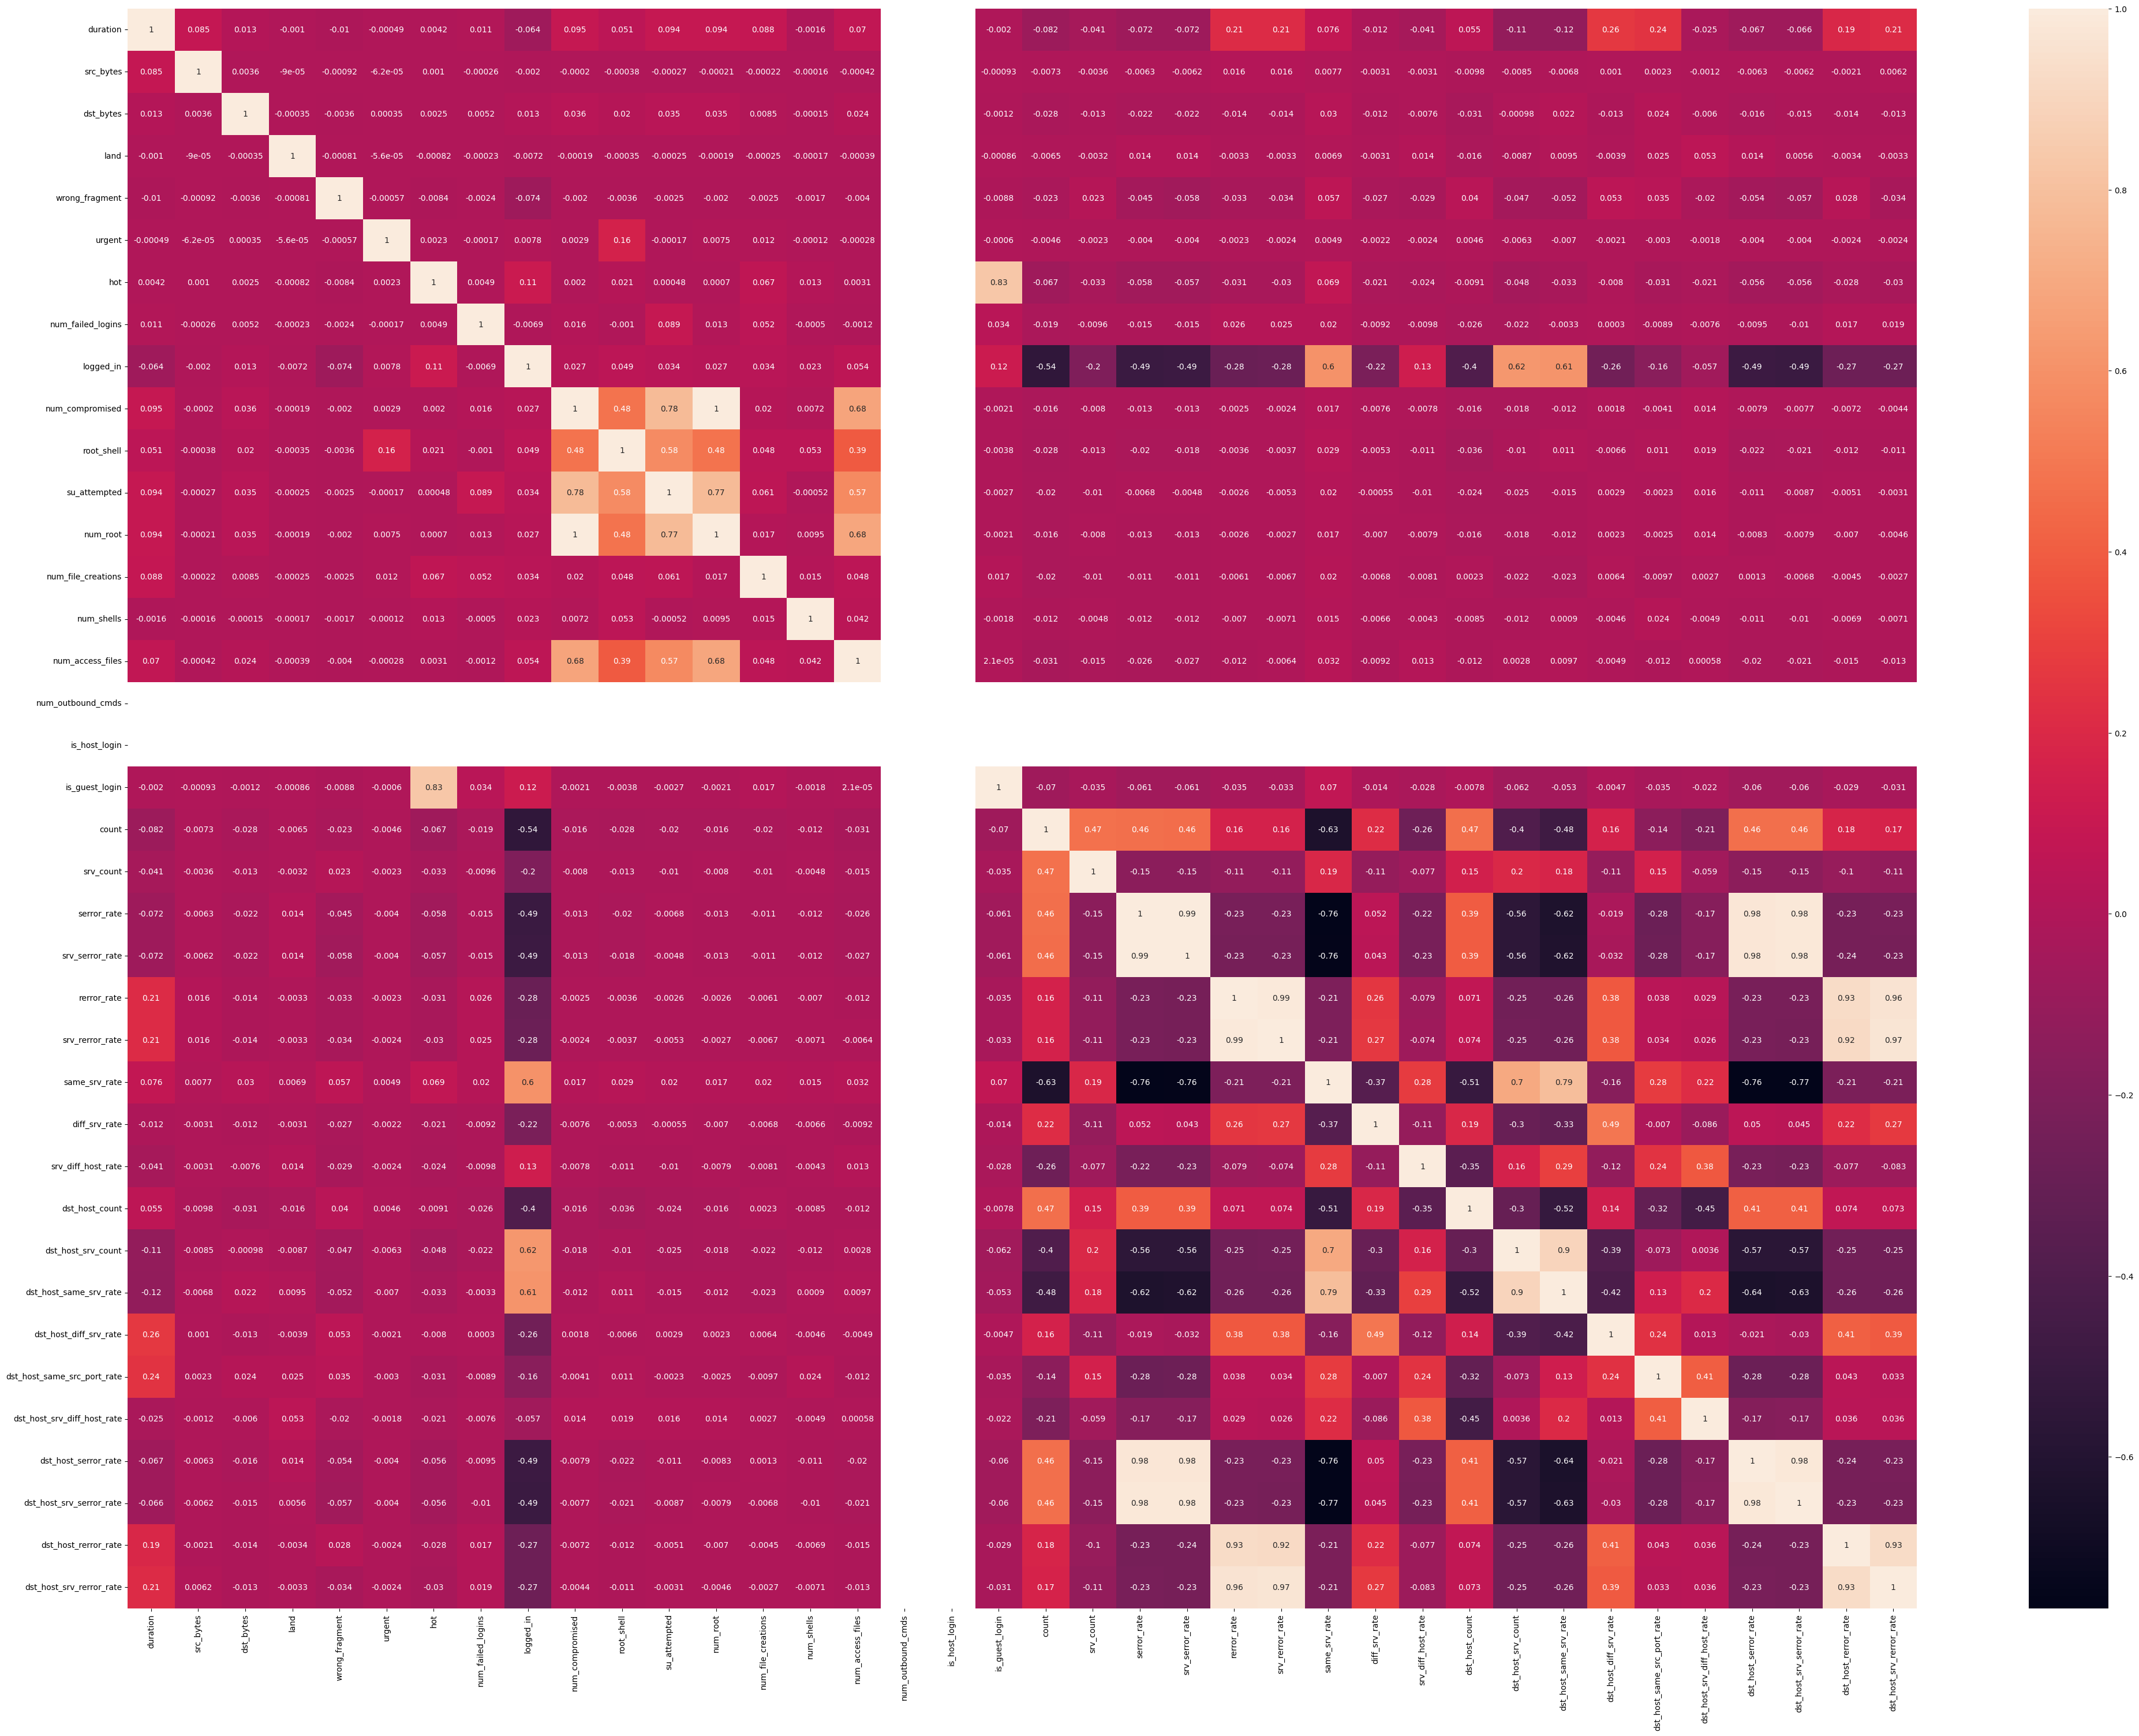

In [30]:
plt.figure(figsize=(50,36))
sns.heatmap(df_train.corr(), annot=True)

In [31]:
df_train.drop(['num_outbound_cmds','is_host_login'], axis=1, inplace=True)
df_test.drop(['num_outbound_cmds','is_host_login'], axis=1, inplace=True)

In [32]:
df_train['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

<Axes: xlabel='class', ylabel='count'>

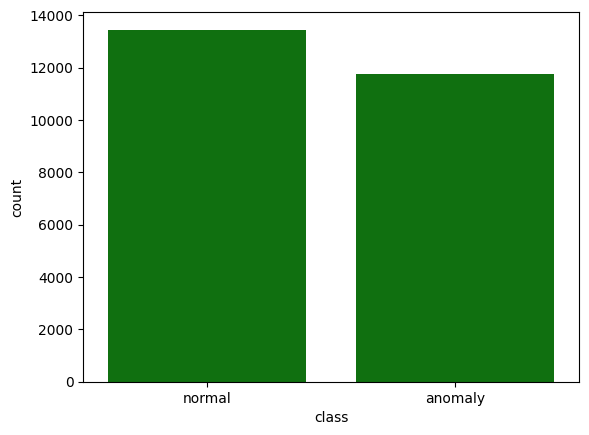

In [33]:
sns.countplot(x=df_train['class'],color='g')

Label encoding

In [34]:
categorical_columns=df_train.select_dtypes(include=['object']).columns
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
for i in categorical_columns:
  df_train[i]=lab.fit_transform(df_train[i])

Feature selection

In [35]:
# finding the correlation matrix
correlation_matrix = df_train.corr()
correlation_matrix.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
duration,1.000000,0.036421,0.101301,-0.066634,0.084864,0.013258,-0.001012,-0.010358,-0.000486,0.004202,...,-0.112530,-0.119321,0.263489,0.240970,-0.025485,-0.066513,-0.066240,0.187070,0.208435,-0.050901
protocol_type,0.036421,1.000000,0.025322,0.094926,-0.001286,-0.004734,-0.001123,0.176420,-0.000794,-0.011589,...,0.104292,0.004797,0.131609,-0.206137,-0.360518,-0.080432,-0.079086,-0.018424,-0.047182,0.283653
service,0.101301,0.025322,1.000000,-0.295491,0.008554,-0.013782,-0.006896,0.088169,0.011325,-0.056165,...,-0.409442,-0.450546,0.280962,-0.101749,-0.153359,0.276906,0.273472,0.141211,0.142865,-0.270494
flag,-0.066634,0.094926,-0.295491,1.000000,-0.006599,0.027606,-0.006593,0.068693,0.004744,0.067027,...,0.584087,0.634415,-0.284016,0.194528,0.078870,-0.447140,-0.447007,-0.680849,-0.716075,0.651309
src_bytes,0.084864,-0.001286,0.008554,-0.006599,1.000000,0.003611,-0.000090,-0.000916,-0.000062,0.000995,...,-0.008520,-0.006776,0.001026,0.002316,-0.001238,-0.006346,-0.006227,-0.002130,0.006190,-0.005743


In [36]:

# choosing the best 1-10 features from same correlated values
sorted_corr_matrix_class= correlation_matrix['class'].abs().sort_values(ascending=False)

# Get the top 10 correlated features
final_features= sorted_corr_matrix_class[1:11]  # Exclude the 'class' itself

print("Top 10 features with the highest absolute correlation with class: \n")
print(final_features.index.tolist())

Top 10 features with the highest absolute correlation with class: 

['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'dst_host_srv_serror_rate', 'flag', 'dst_host_serror_rate', 'serror_rate', 'srv_serror_rate', 'count']


In [46]:
features=sorted_corr_matrix_class.index[1:11]
# Create a DataFrame with these selected features and a copy of the 'class' column
data_prediction = df_train[features].copy()
data_prediction['class'] = df_train['class']

In [52]:
x = data_prediction
y = df_train['class']

In [53]:
#Training and testing of data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=0)

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test= scaler.fit_transform(x_test)

KNN ALGORITHM

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print('Accuracy score of dataset using knn',accuracy_score(y_test,y_pred))


Accuracy score of dataset using knn 0.9994046437785274


SVM

In [56]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
sv=SVC()
sv.fit(x_train,y_train)
y_pred=sv.predict(x_test)
print('Accuracy score of dataset using svm',accuracy_score(y_test,y_pred))

Accuracy score of dataset using svm 1.0


DECISION TREE,RANDOM FOREST,NAIVE-BAYES,LGBM

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
nb=GaussianNB()
d_tree=DecisionTreeClassifier(criterion='entropy')
r_forest=RandomForestClassifier(n_estimators=10,criterion='entropy')
lgbm=LGBMClassifier()
lst_model=[nb,d_tree,r_forest,lgbm]
for model in lst_model:
  print('classifier is:',model)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print('confusion matrix',confusion_matrix(y_test,y_pred))
  print('Accuracy score',accuracy_score(y_test,y_pred))
  print('*'*100)

classifier is: GaussianNB()
confusion matrix [[2326    0]
 [   0 2713]]
Accuracy score 1.0
****************************************************************************************************
classifier is: DecisionTreeClassifier(criterion='entropy')
confusion matrix [[2326    0]
 [   0 2713]]
Accuracy score 1.0
****************************************************************************************************
classifier is: RandomForestClassifier(criterion='entropy', n_estimators=10)
confusion matrix [[2326    0]
 [   0 2713]]
Accuracy score 1.0
****************************************************************************************************
classifier is: LGBMClassifier()
[LightGBM] [Info] Number of positive: 10736, number of negative: 9417
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info]

<Axes: >

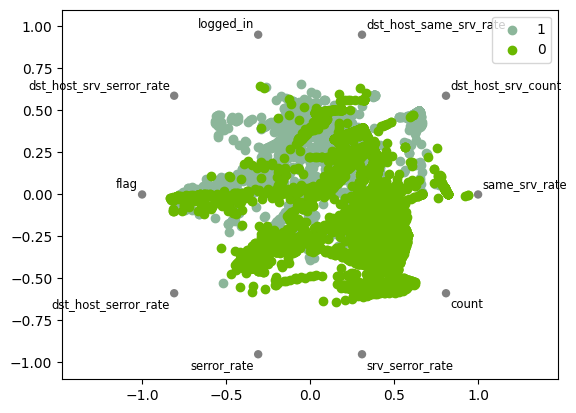

In [65]:
pd.plotting.radviz(data_prediction, 'class')